# Data Analyst - Challenge

In [1]:
# Importing all required liabraries
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
commpany_order_report = pd.read_excel('Company X - Order Report.xlsx')
commpany_order_report.head(2)

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0


In [4]:
company_sku_master = pd.read_excel('Company X - SKU Master.xlsx')
company_sku_master.head(2)

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165


In [5]:
warehouse_customer_pincodes_zones = pd.read_excel('Company X - Pincode Zones.xlsx')
warehouse_customer_pincodes_zones.head(2)

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d


In [6]:
courier_company_invoice = pd.read_excel('Courier Company - Invoice.xlsx')
courier_company_invoice.head(2)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.3,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.0,121003,486886,d,Forward charges,90.2


In [7]:
courier_company_rates = pd.read_excel('Courier Company - Rates.xlsx')
courier_company_rates.head(2)

,fwd_a_fixed,fwd_a_additional,fwd_b_fixed,fwd_b_additional,fwd_c_fixed,fwd_c_additional,fwd_d_fixed,fwd_d_additional,fwd_e_fixed,fwd_e_additional,rto_a_fixed,rto_a_additional,rto_b_fixed,rto_b_additional,rto_c_fixed,rto_c_additional,rto_d_fixed,rto_d_additional,rto_e_fixed,rto_e_additional
0,29.5,23.6,33,28.3,40.1,38.9,45.4,44.8,56.6,55.5,13.6,23.6,20.5,28.3,31.9,38.9,41.3,44.8,50.7,55.5


In [8]:
company_sku_master.head(2)

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165


Here I made empty table required for calculations.

In [9]:
result = pd.DataFrame()
cols=['Order ID','AWB Number','Total weight as per X (KG)','Weight slab as per X (KG)','Total weight as per Courier Company (KG)','Weight slab charged by Courier Company (KG)','Delivery Zone as per X','Delivery Zone charged by Courier Company','Expected Charge as per X (Rs.)']
result[cols]=''
result

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.)


In [10]:

sku_weight_mapping = dict(zip(company_sku_master['SKU'], company_sku_master['Weight (g)']))


In [11]:
def round_up_to_nearest_half_int(num):
    return math.ceil(num * 2) / 2

print(round_up_to_nearest_half_int(0.1))

0.5


In [12]:
commpany_order_report[commpany_order_report["ExternOrderNo"] == 2001806210]

,ExternOrderNo,SKU,Order Qty
398,2001806210,8904223816214,1.0
399,2001806210,8904223818874,1.0


In [13]:
commpany_order_report

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0
...,...,...,...
395,2001806229,8904223818942,1.0
396,2001806229,8904223818850,1.0
397,2001806226,8904223818850,2.0
398,2001806210,8904223816214,1.0


In [14]:
commpany_order_report[commpany_order_report["ExternOrderNo"] == 2001806232]
filtered_orders = commpany_order_report[commpany_order_report["ExternOrderNo"] == 2001806232]
filtered_orders

,ExternOrderNo,SKU,Order Qty
392,2001806232,8904223818645,6.0
393,2001806232,8904223819147,2.0


In this totalWeight function I calculate total weight depending upon the quantity of particular order.

And also did required weight conversions.

In [15]:

def totalWeight(commpany_order_report,order_id):
    filtered_orders = commpany_order_report[commpany_order_report["ExternOrderNo"] == order_id]
    #print(filtered_orders)
    filtered_orders = filtered_orders.reset_index(drop=True)
    #print(filtered_orders.loc[0,'SKU'])
    total_weight = 0
    for i in range(len(filtered_orders)):
        sku = filtered_orders.loc[i,'SKU']
        quantity = filtered_orders.loc[i,'Order Qty']
        weight = sku_weight_mapping[sku]
        total_weight = total_weight + quantity*weight
        #print(quantity)
        #print(total_weight)
    total_weight = total_weight / 1000
    
    return total_weight


In [16]:

def getZone(warehouse_customer_pincodes_zones,warehouse_pincode_courier_company,customer_pincode_courier_company):
    filtered_pincodes=warehouse_customer_pincodes_zones[(warehouse_customer_pincodes_zones['Warehouse Pincode'] == warehouse_pincode_courier_company) & (warehouse_customer_pincodes_zones['Customer Pincode'] ==customer_pincode_courier_company )]
    zone = filtered_pincodes['Zone']
    zone = str(zone)
    zonelist = zone.split()
    zone = zonelist[1]
    return zone.upper()
getZone(warehouse_customer_pincodes_zones,121003,486886)

'D'

In [17]:
a_zone_rates = courier_company_rates[["fwd_a_fixed","fwd_a_additional","rto_a_fixed","rto_a_additional"]]
b_zone_rates = courier_company_rates[["fwd_b_fixed","fwd_b_additional","rto_b_fixed","rto_b_additional"]]
c_zone_rates = courier_company_rates[["fwd_c_fixed","fwd_c_additional","rto_c_fixed","rto_c_additional"]]
d_zone_rates = courier_company_rates[["fwd_d_fixed","fwd_d_additional","rto_d_fixed","rto_d_additional"]]
e_zone_rates = courier_company_rates[["fwd_e_fixed","fwd_e_additional","rto_e_fixed","rto_e_additional"]]
print(e_zone_rates)
type(a_zone_rates['fwd_a_fixed'][0])
fwd_a_fixed=a_zone_rates['fwd_a_fixed'][0]
fwd_a_additional=a_zone_rates['fwd_a_fixed'][0]
rto_a_fixed=a_zone_rates['fwd_a_fixed'][0]
rto_a_additional=a_zone_rates['fwd_a_fixed'][0]
fwd_b_fixed=b_zone_rates['fwd_b_fixed'][0]
fwd_b_additional=b_zone_rates['fwd_b_additional'][0]
rto_b_fixed=b_zone_rates['rto_b_fixed'][0]
rto_b_additional=b_zone_rates['rto_b_additional'][0]
fwd_c_fixed=c_zone_rates['fwd_c_fixed'][0]
fwd_c_additional=c_zone_rates['fwd_c_additional'][0]
rto_c_fixed=c_zone_rates['rto_c_fixed'][0]
rto_c_additional=c_zone_rates['rto_c_additional'][0]
fwd_d_fixed=d_zone_rates['fwd_d_fixed'][0]
fwd_d_additional=d_zone_rates['fwd_d_additional'][0]
rto_d_fixed=d_zone_rates['rto_d_fixed'][0]
rto_d_additional=d_zone_rates['rto_d_additional'][0]
fwd_e_fixed=e_zone_rates['fwd_e_fixed'][0]
fwd_e_additional=e_zone_rates['fwd_e_additional'][0]
rto_e_fixed=e_zone_rates['rto_e_fixed'][0]
rto_e_additional=e_zone_rates['rto_e_additional'][0]
rto_e_additional

   fwd_e_fixed  fwd_e_additional  rto_e_fixed  rto_e_additional
0         56.6              55.5         50.7              55.5


55.5

This billOfX() function made to calculate 'Expected Charge as per X (Rs.)' 

In [18]:
def billOfX(type_of_shipment,total_weight_slab,zone):
    bill=0
    if(total_weight_slab<=0.5):
        if(zone=="A"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + fwd_a_fixed
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + rto_a_fixed
        elif(zone=="B"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + fwd_b_fixed
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + rto_b_fixed
        elif(zone=="C"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + fwd_c_fixed
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + rto_c_fixed 
        elif(zone=="D"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + fwd_d_fixed
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + rto_d_fixed
        elif(zone=="E"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + fwd_e_fixed
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + rto_e_fixed
    
    elif(total_weight_slab>0.5):
        if(zone=="A"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + (fwd_a_fixed + fwd_a_additional)*total_weight_slab
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + (rto_a_fixed + rto_a_additional)*total_weight_slab
        elif(zone=="B"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + (fwd_b_fixed + fwd_b_additional)*total_weight_slab
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + (rto_b_fixed + rto_b_additional)*total_weight_slab
        elif(zone=="C"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + (fwd_c_fixed + rto_d_additional)*total_weight_slab
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + (rto_c_fixed + rto_d_additional)*total_weight_slab
        elif(zone=="D"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + (fwd_d_fixed + rto_d_additional)*total_weight_slab
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + (rto_d_fixed + rto_d_additional)*total_weight_slab
        elif(zone=="E"):
            if(type_of_shipment=='Forward charges'):
                bill = bill + (fwd_e_fixed + rto_e_additional)*total_weight_slab
            elif(type_of_shipment=='Forward and RTO charges'):
                bill = bill + (rto_e_fixed + rto_e_additional)*total_weight_slab
        
    return bill

In [19]:
billOfX('Forward charges',1.5,'D')

135.29999999999998

In [20]:
for i in range(len(courier_company_invoice)):
    order_id = courier_company_invoice.loc[i, "Order ID"]
    awd_code = courier_company_invoice.loc[i, "AWB Code"]
    total_weight = totalWeight(commpany_order_report,order_id)
    total_weight_slab = round_up_to_nearest_half_int(total_weight)
    total_weight_courier_company= courier_company_invoice.loc[i, "Charged Weight"]
    weight_slab_couries_company= round_up_to_nearest_half_int(total_weight_courier_company)
    
    
    total_weight_slab = round_up_to_nearest_half_int(total_weight)
    
    warehouse_pincode_courier_company  =  courier_company_invoice.loc[i, "Warehouse Pincode"]
    customer_pincode_courier_company =  courier_company_invoice.loc[i, "Customer Pincode"]
    zone = getZone(warehouse_customer_pincodes_zones,warehouse_pincode_courier_company,customer_pincode_courier_company)
    
    delivery_zone_courier_company = courier_company_invoice.loc[i, "Zone"]
    
    type_of_shipment = courier_company_invoice.loc[i, "Type of Shipment"]
    bill = billOfX(type_of_shipment,total_weight_slab,zone)
    
    charges_courier_company = courier_company_invoice.loc[i, "Billing Amount (Rs.)"]
    print(charges_courier_company)

    result.loc[i, "Order ID"]=order_id
    result.loc[i, "AWB Number"]=awd_code
    result.loc[i, "Total weight as per X (KG)"]=total_weight
    result.loc[i, "Weight slab as per X (KG)"]=total_weight_slab
    result.loc[i, "Total weight as per Courier Company (KG)"]=total_weight_courier_company
    result.loc[i, "Weight slab charged by Courier Company (KG)"]=weight_slab_couries_company
    result.loc[i, "Delivery Zone as per X"]=zone
    result.loc[i, "Delivery Zone charged by Courier Company"]=delivery_zone_courier_company.upper()
    result.loc[i, "Expected Charge as per X (Rs.)"]=bill
    result.loc[i, "Charges Billed by Courier Company (Rs.)"]=charges_courier_company
    result.loc[i, "Difference Between Expected Charges and Billed Charges (Rs.)"]=round(bill-charges_courier_company,2)  
    

135.0
90.2
224.6
61.3
45.4
45.4
61.3
89.6
45.4
45.4
61.3
90.2
89.6
90.2
45.4
135.0
33.0
90.2
107.3
61.3
90.2
89.6
172.8
102.3
172.8
172.8
213.5
258.9
151.1
172.8
345.0
258.9
172.8
174.5
90.2
90.2
61.3
135.0
90.2
90.2
90.2
61.3
135.0
61.3
89.6
90.2
135.0
90.2
90.2
174.5
89.6
90.2
179.8
90.2
179.8
61.3
89.6
135.0
269.4
179.8
90.2
45.4
90.2
90.2
90.2
90.2
90.2
90.2
90.2
86.7
269.4
90.2
90.2
86.7
45.4
90.2
45.4
224.6
45.4
45.4
45.4
90.2
45.4
45.4
90.2
135.0
45.4
61.3
33.0
117.9
90.2
135.0
90.2
90.2
90.2
224.6
90.2
90.2
403.8
90.2
135.0
90.2
61.3
90.2
179.8
224.6
90.2
90.2
90.2
90.2
90.2
90.2
90.2
179.8
224.6
90.2
90.2
135.0
90.2
90.2
86.7
45.4
33.0
45.4


In [21]:
pd.options.display.max_rows=124

In [22]:
result

,Order ID,AWB Number,Total weight as per X (KG),Weight slab as per X (KG),Total weight as per Courier Company (KG),Weight slab charged by Courier Company (KG),Delivery Zone as per X,Delivery Zone charged by Courier Company,Expected Charge as per X (Rs.),Charges Billed by Courier Company (Rs.),Difference Between Expected Charges and Billed Charges (Rs.)
0,2001806232,1091117222124,1.302,1.5,1.3,1.5,D,D,135.3,135.0,0.30
1,2001806273,1091117222194,0.615,1.0,1.0,1.0,D,D,90.2,90.2,-0.00
2,2001806408,1091117222931,2.265,2.5,2.5,2.5,D,D,225.5,224.6,0.90
3,2001806458,1091117223244,0.7,1.0,1.0,1.0,B,B,61.3,61.3,0.00
4,2001807012,1091117229345,0.24,0.5,0.15,0.5,D,D,45.4,45.4,0.00
5,2001806686,1091117229555,0.24,0.5,0.15,0.5,D,D,45.4,45.4,0.00
6,2001806885,1091117229776,0.84,1.0,1.0,1.0,B,B,61.3,61.3,0.00
7,2001807058,1091117323112,1.168,1.5,1.15,1.5,B,B,91.95,89.6,2.35
8,2001807186,1091117323812,0.5,0.5,0.5,0.5,D,D,45.4,45.4,0.00
9,2001807290,1091117324206,0.5,0.5,0.5,0.5,D,D,45.4,45.4,0.00


In [111]:
result.to_excel("Calculations.xlsx", index=False)

In [23]:
summary = pd.DataFrame(index=['Total orders where X has been correctly charged ','Total Orders where X has been overcharged ','Total Orders where X has been undercharged'])
cols=['Count','Amount (RS.)']
summary[cols]=''
summary

,Count,Amount (RS.)
Total orders where X has been correctly charged,,
Total Orders where X has been overcharged,,
Total Orders where X has been undercharged,,


In [24]:
correctly_charged=0
undercharged=0
overcharged=0

correct_amount = 0
undercharge_amount = 0
overcharge_amount = 0

for i in result["Difference Between Expected Charges and Billed Charges (Rs.)"]:
    if i == 0:
        correctly_charged = correctly_charged+1
        correct_amount = abs(correct_amount + i)
    elif i > 0:
        undercharged = undercharged+1
        undercharge_amount = abs(undercharge_amount+i)
    else:
        overcharged=overcharged+1
        overcharge_amount = overcharge_amount+i
overcharge_amount=abs(overcharge_amount)
        

In [25]:
overcharge_amount

5667.799999999997

In [26]:
##summary.iloc[row,column]
summary.iloc[0,0] = correctly_charged
summary.iloc[1,0] = overcharged
summary.iloc[2,0] = undercharged

In [27]:
summary.iloc[0,1] = correct_amount
summary.iloc[1,1] = overcharge_amount
summary.iloc[2,1] = undercharge_amount

In [28]:
summary

,Count,Amount (RS.)
Total orders where X has been correctly charged,15,0.0
Total Orders where X has been overcharged,92,5667.8
Total Orders where X has been undercharged,17,501.2


In [29]:
summary.to_excel("Summary.xlsx")

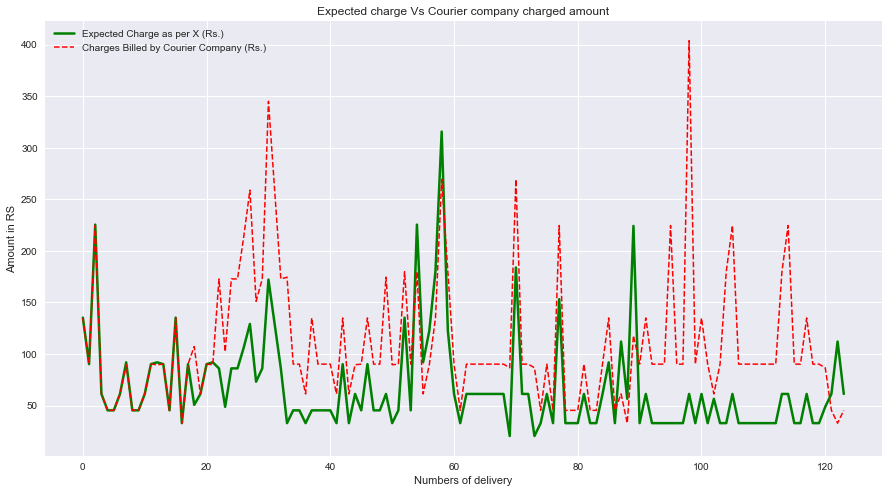

In [30]:
style.use('seaborn')
plt.figure(figsize=(15,8))

plt.plot(result["Expected Charge as per X (Rs.)"], 'g', linestyle='-',linewidth=2.5, label='Expected Charge as per X (Rs.)')
plt.plot(result["Charges Billed by Courier Company (Rs.)"], 'r', linestyle='--',linewidth=1.5, label='Charges Billed by Courier Company (Rs.)')


plt.xlabel("Numbers of delivery")
plt.ylabel("Amount in RS")
plt.title("Expected charge Vs Courier company charged amount")

plt.legend()

Text(0.5, 1.0, 'Delivery Zone per Expected charge')

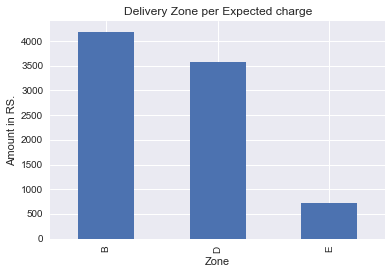

In [31]:
result.groupby('Delivery Zone as per X')['Expected Charge as per X (Rs.)'].sum().plot(kind='bar')

plt.ylabel("Amount in RS.")
plt.xlabel("Zone")
plt.title("Delivery Zone per Expected charge")